In [1]:
import sys
sys.path.append("../") # ugly way to have .py files in the PYTHONPATH

In [2]:
import graph_tool.all as gt

from utils import get_config, read_id_table, read_info_files

In [3]:
CONFIG = "../config_old.yaml"
DIR = ".."

In [4]:
config = get_config(CONFIG, section="alex")
datadir = config["output_dir"]
citation_graph_file = config["citation_graph_file"]
id_table_file = config["id_table"]

In [5]:
edges = []
with open(f"{DIR}/{datadir}/{citation_graph_file}", "r") as f:
    for line in f:
        edges.append(line.strip().split(","))
len(edges)

1673

In [6]:
# prepare nodes
id2alex, alex2id = read_id_table(f"{DIR}/{datadir}/{id_table_file}")

In [7]:
nodes = id2alex.keys()
print(len(nodes))

1605


In [8]:
g = gt.Graph(directed=True)
node_id = g.new_vp("string")
id2node = {}

In [9]:
for node in nodes:
     gnode = g.add_vertex()
     node_id[gnode] = node
     id2node[node] = gnode

In [10]:
for node1, node2 in edges:
    gnode1, gnode2 = id2node[node1], id2node[node2]
    g.add_edge(gnode2, gnode1)

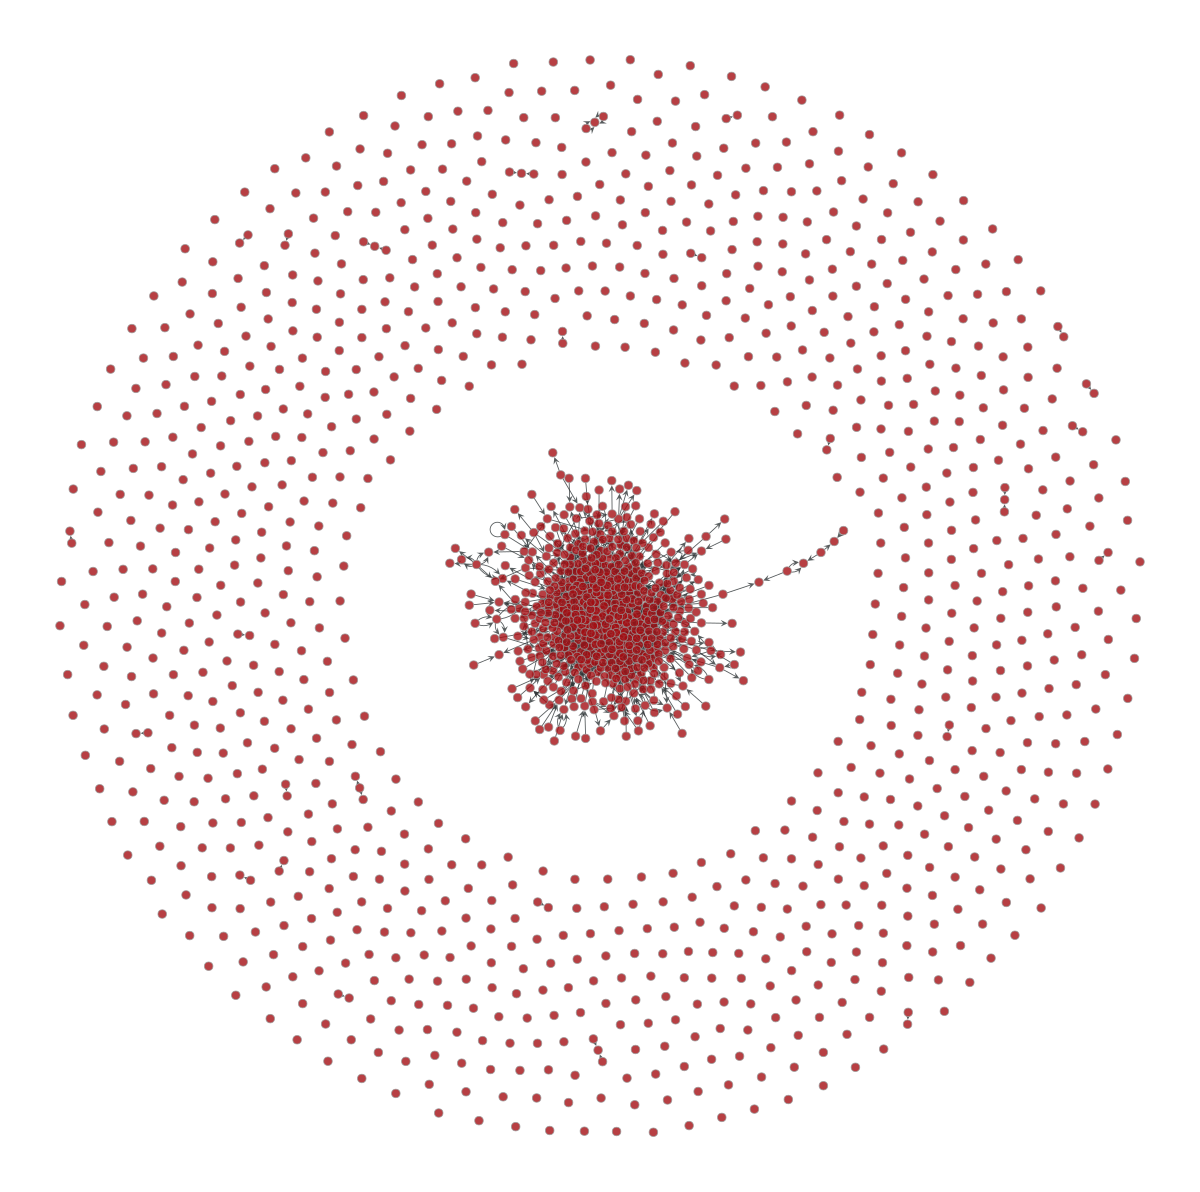

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x72c787da5490, at 0x72c787e3b380>

In [11]:
gt.graph_draw(g)

In [23]:
u = gt.GraphView(g, vfilt=lambda v:  v.in_degree() + v.out_degree() > 2)

In [24]:
node_size = g.new_vp("int")
for node in g.vertices():
    node_size[node] = node.in_degree()+1

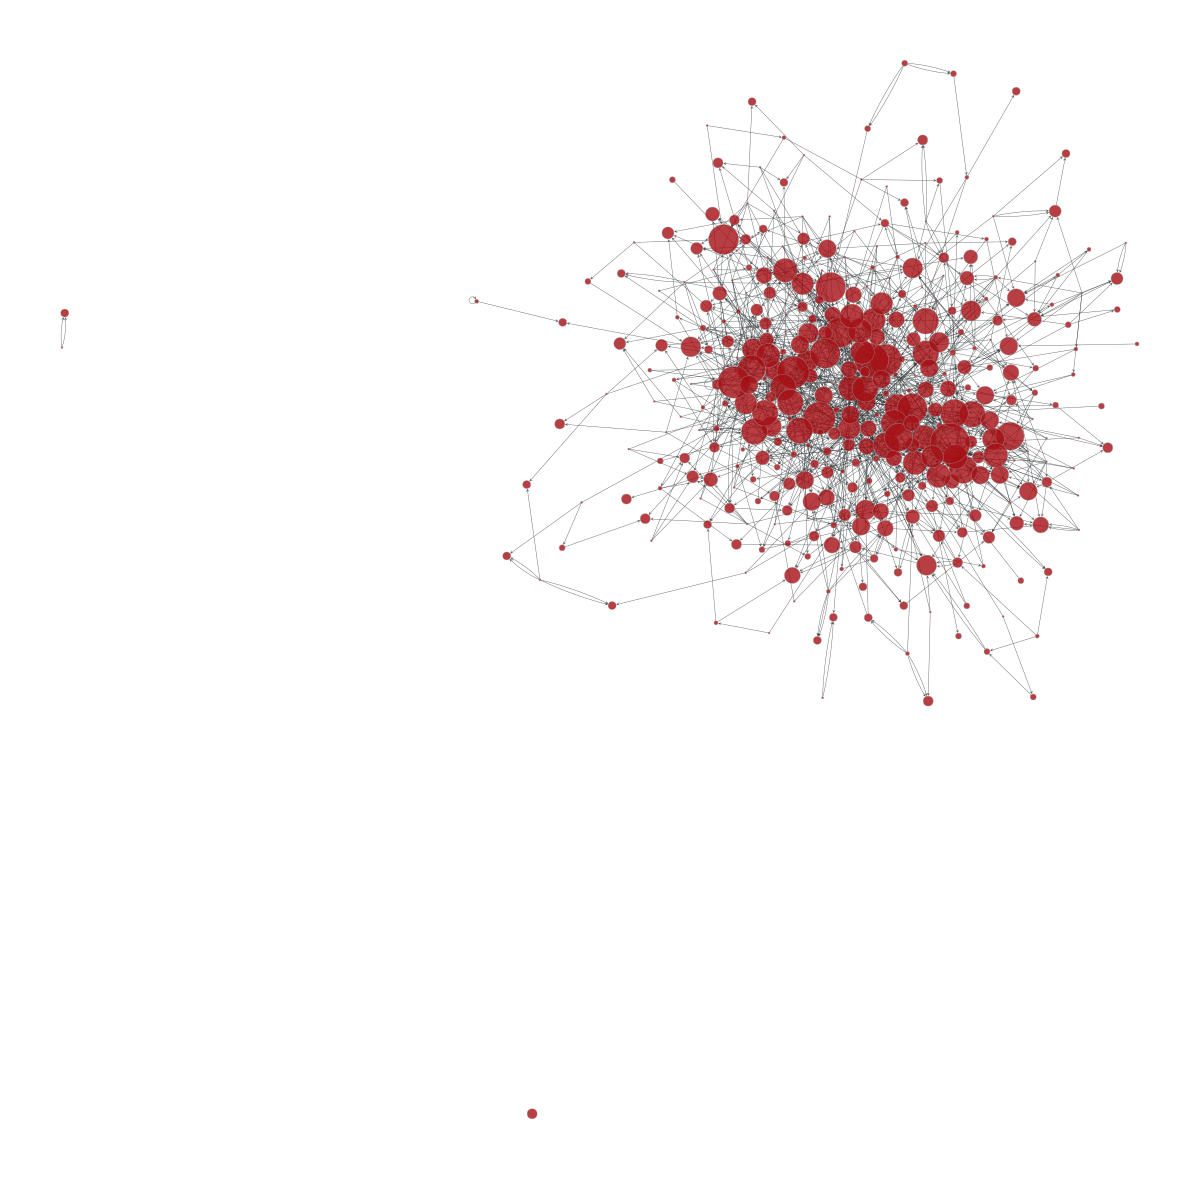

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x72c791084230, at 0x72c85040dd60>

In [25]:
gt.graph_draw(u, vertex_size=node_size)

In [15]:
nodes = sorted(g.vertices(), key=lambda v: node_size[v], reverse=True)

In [16]:
node_id[nodes[1]]

'http://arxiv.org/abs/1904.04123v2'

In [17]:
config2 = get_config(CONFIG, section="download")
datadir = config2["output_dir"]

In [18]:
df_info = read_info_files(f"{DIR}/{datadir}")

In [19]:
df_info = df_info[["id", "title", "authors"]]

In [20]:
for node in nodes[:10]:
    print(df_info.loc[df_info["id"] == node_id[node], "title"],
          df_info.loc[df_info["id"] == node_id[node], "authors"])
                    

33    Neural Architecture Optimization
Name: title, dtype: object 33    Renqian Luo;Fei Tian;Tao Qin;Enhong Chen;Tie-Y...
Name: authors, dtype: object
94    ASAP: Architecture Search, Anneal and Prune
Name: title, dtype: object 94    Asaf Noy;Niv Nayman;Tal Ridnik;Nadav Zamir;Siv...
Name: authors, dtype: object
85    BayesNAS: A Bayesian Approach for Neural Archi...
Name: title, dtype: object 85    Hongpeng Zhou;Minghao Yang;Jun Wang;Wei Pan
Name: authors, dtype: object
26    Bridging the Gap between Sample-based and One-...
Name: title, dtype: object 26    Han Shi;Renjie Pi;Hang Xu;Zhenguo Li;James T. ...
Name: authors, dtype: object
23    You Only Search Once: Single Shot Neural Archi...
Name: title, dtype: object 23    Xinbang Zhang;Zehao Huang;Naiyan Wang
Name: authors, dtype: object
53    Deeper Insights into Weight Sharing in Neural ...
Name: title, dtype: object 53    Yuge Zhang;Zejun Lin;Junyang Jiang;Quanlu Zhan...
Name: authors, dtype: object
73    DrNAS: Dirichlet Neural Arc

In [21]:
for node in u.vertices():
    if "1910.11858v3" in node_id[node]:
        print(node_size[node])

9


In [22]:
node_size[nodes[0]]

20